# Capstone Section 3: Feature Engineering
<br>

## Task
<br>

1) Change the city population to 3 types from largest to smallest, City, Town, Rural. This is the definition: [Link](https://blogs.worldbank.org/sustainablecities/how-do-we-define-cities-towns-and-rural-areas) 
<br>
[Task 1](#Task-1)

2) Convert Hour of the day to either day or night [Task 2](#Task-2)

3) Change the age to a categorical feature based on the definition:
[Definition](https://www.pewresearch.org/fact-tank/2019/01/17/where-millennials-end-and-generation-z-begins/)
<br>
[Task 3](#Task-3)

6) Perform one hot encoding [Task 6](#Task-6)

7) Detecting Multicollinearity with VIF [Task 7](#Task-7)

8) Perform train test split [Task 8](#Task-8)

9) Create 1 data set using Standard Scaler [Task 9](#Task-9)

10) Create 1 data set using Min Max Scaler [Task 10](#Task-10)

## Importing Libraries

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

## Reading Data Files

In [2]:
df_cleaned = pd.read_feather('./Data/df_cleaned.feather')
df_cleaned.head()

,amt,category,gender,city_pop,Hour,Day,Age,is_fraud
0,2.86,personal care,M,333497,12,Sun,54,0
1,29.84,personal care,F,302,12,Sun,32,0
2,41.28,health fitness,F,34496,12,Sun,52,0
3,60.05,misc pos,M,54767,12,Sun,35,0
4,3.19,travel,M,1126,12,Sun,67,0


In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   amt       555719 non-null  float64
 1   category  555719 non-null  object 
 2   gender    555719 non-null  object 
 3   city_pop  555719 non-null  int64  
 4   Hour      555719 non-null  int64  
 5   Day       555719 non-null  object 
 6   Age       555719 non-null  int64  
 7   is_fraud  555719 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 33.9+ MB


## Task 1

In [4]:
(df_cleaned['city_pop'] >= 50_000).sum()

103517

In [5]:
((df_cleaned['city_pop'] >= 5_000) & (df_cleaned['city_pop'] < 50_000)).sum()

112921

In [6]:
(df_cleaned['city_pop'] < 5_000).sum()

339281

In [7]:
103517 + 112921 + 339281

555719

### Comments:
<br>
1) We must get 10,3517 Cities, 112,921 Towns and 339,281 Rural
<br>
<br>

In [8]:
conditions = [(df_cleaned['city_pop'] >= 50_000),
             ((df_cleaned['city_pop'] >= 5_000) & (df_cleaned['city_pop'] < 50_000)),
             (df_cleaned['city_pop'] < 5_000)]
value = ['City', 'Town', 'Rural']

df_cleaned['city_pop'] = np.select(condlist=conditions, choicelist=value)

In [9]:
df_cleaned['city_pop'].value_counts()

Rural    339281
Town     112921
City     103517
Name: city_pop, dtype: int64

## Task 2
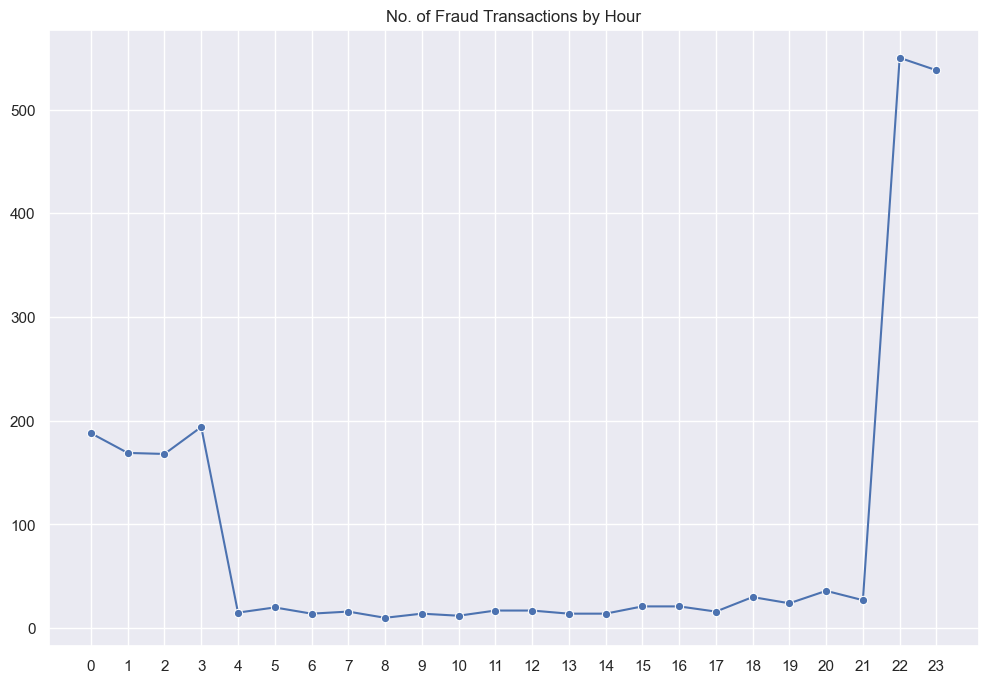

### Comments:
<br>
1) From the above graph, let's define night as after 8pm (2000) to before 4am (0400)
<br>
<br>

In [10]:
((df_cleaned['Hour'] > 20) | (df_cleaned['Hour'] < 4)).sum()

158344

In [11]:
((df_cleaned['Hour'] <= 20) & (df_cleaned['Hour'] >= 4)).sum()

397375

In [12]:
158344 + 397375

555719

### Comments:
<br>
1) We must get 397,375 Night and 158,344 Day
<br>
<br>

In [13]:
conditions = [((df_cleaned['Hour'] > 20) | (df_cleaned['Hour'] < 4)),
             ((df_cleaned['Hour'] <= 20) & (df_cleaned['Hour'] >= 4))]
value = ['Night', 'Day']

df_cleaned['Hour'] = np.select(condlist=conditions, choicelist=value)

In [14]:
df_cleaned['Hour'].value_counts()

Day      397375
Night    158344
Name: Hour, dtype: int64

## Task 3

In [15]:
df_cleaned['Age'].min()

17

In [16]:
df_cleaned['Age'].max()

98

In [17]:
((df_cleaned['Age'] >= 77) & (df_cleaned['Age'] <= 98)).sum()

45595

In [18]:
((df_cleaned['Age'] >= 58) & (df_cleaned['Age'] < 77)).sum()

108275

In [19]:
((df_cleaned['Age'] >= 42) & (df_cleaned['Age'] < 58)).sum()

184129

In [20]:
((df_cleaned['Age'] >= 26) & (df_cleaned['Age'] < 42)).sum()

177031

In [21]:
(df_cleaned['Age'] < 26).sum()

40689

In [22]:
45595 + 108275 + 184129 + 177031 + 40689

555719

### Comments:
<br>
1) We must get 45,595 Silent Generation, 108,275 Boomers, 184,129 Gen X, 177,031 Millennials and 40,689 Gen Z
<br>
<br>

In [23]:
conditions = [((df_cleaned['Age'] >= 77) & (df_cleaned['Age'] <= 98)),
             ((df_cleaned['Age'] >= 58) & (df_cleaned['Age'] < 77)),
             ((df_cleaned['Age'] >= 42) & (df_cleaned['Age'] < 58)),
             ((df_cleaned['Age'] >= 26) & (df_cleaned['Age'] < 42)),
             (df_cleaned['Age'] < 26)] 
value = ['Silent', 'Boomers', 'Gen X', 'Millennials', 'Gen Z']

df_cleaned['Age'] = np.select(condlist=conditions, choicelist=value);

In [24]:
df_cleaned['Age'].value_counts()

Gen X          184129
Millennials    177031
Boomers        108275
Silent          45595
Gen Z           40689
Name: Age, dtype: int64

## Task 6

In [25]:
df_cleaned.head()

,amt,category,gender,city_pop,Hour,Day,Age,is_fraud
0,2.86,personal care,M,City,Day,Sun,Gen X,0
1,29.84,personal care,F,Rural,Day,Sun,Millennials,0
2,41.28,health fitness,F,Town,Day,Sun,Gen X,0
3,60.05,misc pos,M,City,Day,Sun,Millennials,0
4,3.19,travel,M,Rural,Day,Sun,Boomers,0


In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   amt       555719 non-null  float64
 1   category  555719 non-null  object 
 2   gender    555719 non-null  object 
 3   city_pop  555719 non-null  object 
 4   Hour      555719 non-null  object 
 5   Day       555719 non-null  object 
 6   Age       555719 non-null  object 
 7   is_fraud  555719 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 33.9+ MB


In [27]:
df_cleaned = pd.get_dummies(data=df_cleaned , drop_first=True)
df_cleaned.head()

,amt,is_fraud,category_food dining,category_gas transport,category_grocery net,category_grocery pos,category_health fitness,category_home,category_kids pets,category_misc net,...,Day_Mon,Day_Sat,Day_Sun,Day_Thurs,Day_Tues,Day_Weds,Age_Gen X,Age_Gen Z,Age_Millennials,Age_Silent
0,2.86,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,29.84,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,41.28,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,60.05,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,3.19,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Task 7

In [28]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

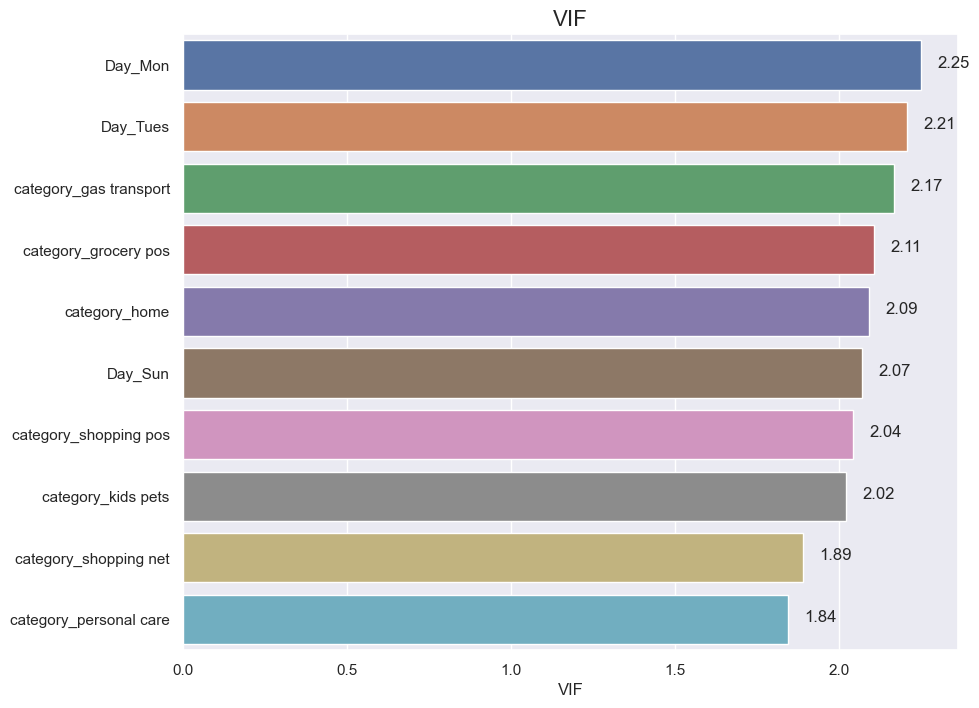

In [29]:
#Calculating VIF
VIF = calculate_vif(df=df_cleaned.drop(labels='is_fraud', axis=1), features=df_cleaned.drop(labels='is_fraud', axis=1).columns).sort_values(by='VIF', ascending=False).head(10)

#Setting Size of Chart
sns.set(rc={'figure.figsize':(10,8)})

#Plotting VIF
fig = sns.barplot(data=VIF, x='VIF', y=VIF.index)

#Adding values to charts
for p in fig.patches:
    width = p.get_width()
    plt.text(0.05+ p.get_width(), p.get_y() + 0.55*p.get_height(), '{:1.2f}'.format(width))

# Update title
plt.title('VIF', fontsize=16)

# Show chart
plt.show();

### Comments:
<br>
1) All the VIF values are below 5 indicating moderate correlation between the features.

## Task 8

In [30]:
X = df_cleaned.drop(labels='is_fraud', axis=1)
y = df_cleaned['is_fraud']

In [31]:
X.shape

(555719, 28)

In [32]:
y.shape

(555719,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
y_train.to_pickle('./Data/y_train.pkl')
y_test.to_pickle('./Data/y_test.pkl')

## Task 9

In [35]:
X_train_ss = X_train
X_test_ss = X_test

In [36]:
ss = StandardScaler()
X_train_ss['amt'] = ss.fit_transform(X_train_ss[['amt']])
X_test_ss['amt'] = ss.transform(X_test_ss[['amt']])

In [37]:
X_train_ss.to_pickle('./Data/Standard Scaler/X_train_ss.pkl')
X_test_ss.to_pickle('./Data/Standard Scaler/X_test_ss.pkl')

## Task 10

In [38]:
X_train_mms = X_train
X_test_mms = X_test

In [39]:
mms = MinMaxScaler()
X_train_mms['amt'] = mms.fit_transform(X_train_mms[['amt']])
X_test_mms['amt'] = mms.transform(X_test_mms[['amt']])

In [40]:
X_train_mms.to_pickle('./Data/Min Max Scaler/X_train_mms.pkl')
X_test_mms.to_pickle('./Data/Min Max Scaler/X_test_mms.pkl')